<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP3/TP3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO # 1**

Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia).
Tip: reutilizar el código de la NB que vimos para outliers.
Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y también cambiando centroide y covariancia de las clases.

In [16]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
N_data = 100
mediaA1 = 5
mediaB1 = 2
desvA1 = 2
desvB1 = 2.5

mediaA2 = 6
mediaB2 = 8
desvA2 = 2
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y
97,1,2.616887,5.120931
27,1,2.838484,0.062846
55,1,5.848545,2.014790
123,0,5.523851,12.690221
1,1,7.491160,-0.251745


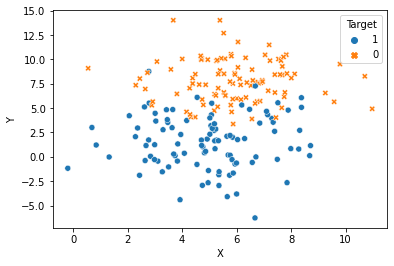

In [19]:
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")

Se fracciona el Dataset en Train y Test en 50/50

In [20]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Se entrena el modelo KNN para un valor de 10 vecinos cercanos y se observan los parametros de calidad del modelo

In [21]:
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.91      0.91      0.91        46

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100




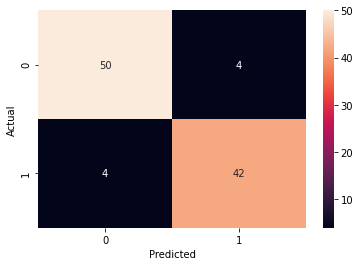

In [23]:
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Se puede observar como el modelo en general hace una buena clasificación y manteniendo los parametros de calidad del modelo por encima de 0.9

**Variando el tamaño de dataset N = 100, 300, 600, 900. Manteniendo k = 10**

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.85      0.94      0.89        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100




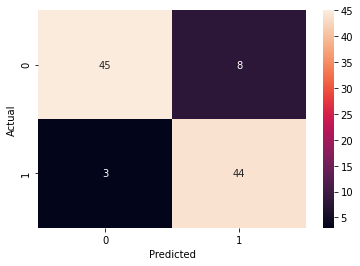

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       143
           1       0.96      0.85      0.90       157

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300




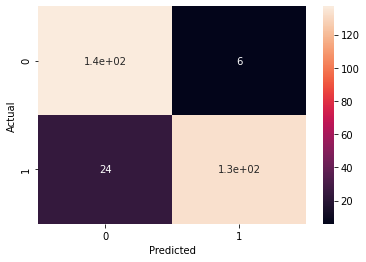

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       287
           1       0.95      0.87      0.91       313

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600




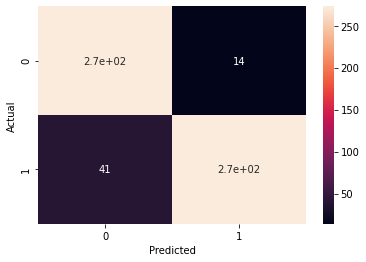

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       449
           1       0.93      0.90      0.92       451

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900




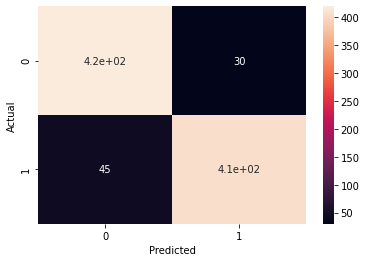

In [24]:
N_data = [100, 300, 600, 900]

for a in N_data:

  X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=a), np.random.normal(loc= mediaB1, scale=desvB1, size=a)
  df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

  X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=a), np.random.normal(loc= mediaB2, scale=desvB2, size=a)
  df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

  df = pd.concat([df1,df2], ignore_index= True, axis=0)
  df = df.sample(n = a*2) 
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Existe alguna variación en los parametros de calidad del modelo a medida que se aumenta el numero de datos, esto debido a la distribución de estos en fucion de la media y la covarianza. Sin embargo el modelo es muy estable y mantiene buenos indices de clasificación. 

**Variando el numero de vecinos k, para N = 100**

valor de k =5
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        40
           1       0.94      0.75      0.83        60

    accuracy                           0.82       100
   macro avg       0.82      0.84      0.82       100
weighted avg       0.85      0.82      0.82       100




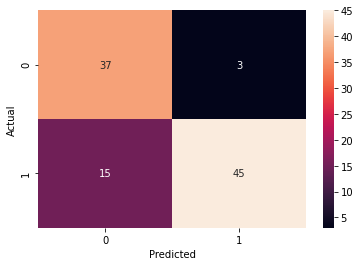

valor de k =10
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        40
           1       0.96      0.77      0.85        60

    accuracy                           0.84       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.87      0.84      0.84       100




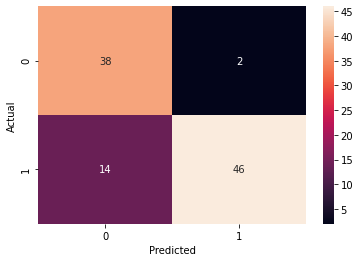

valor de k =20
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        40
           1       0.94      0.80      0.86        60

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.85      0.85       100




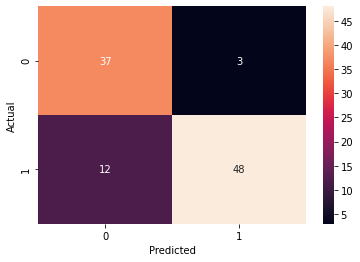

valor de k =40
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        40
           1       0.92      0.78      0.85        60

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.85      0.83      0.83       100




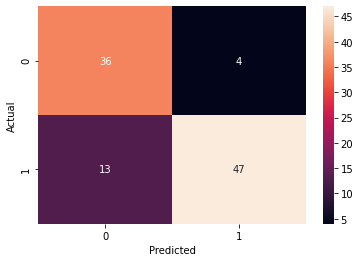

valor de k =80
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.40      1.00      0.57        40
           1       0.00      0.00      0.00        60

    accuracy                           0.40       100
   macro avg       0.20      0.50      0.29       100
weighted avg       0.16      0.40      0.23       100




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


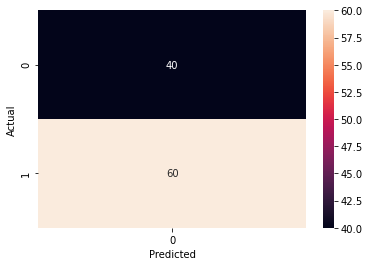

In [25]:

N_data = 100

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn = [5, 10, 20, 40, 80]

for k in knn:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print('valor de k =' + str(k))
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Puede observarse un comportamiento inestable en función del numero de vecinos para el cual el modelo hace la clasificación, sin embargo se observa como involucrar un valor muy alto de k puede ser nocivo para el modelo como el en caso de k = 80. Es por esto que el valor de k debe estar alrededor de la raiz de N. Ademas que entre más vecinos a considerar más lento es el modelo.

**Variando los centroides y covarianzas del Dataset, con k = 10**

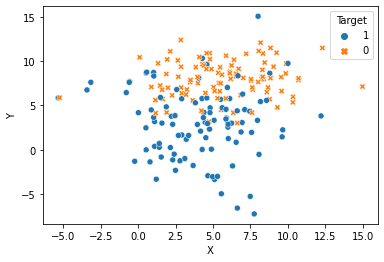

In [27]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
desvA1 = 3
desvB1 = 4

mediaA2 = 6
mediaB2 = 8
desvA2 = 3
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        53
           1       0.80      0.74      0.77        47

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100




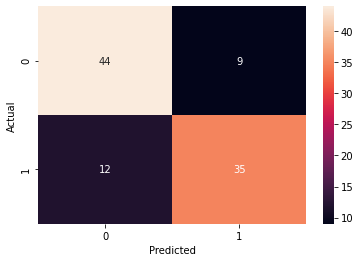

In [29]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Puede observarse como al tener un dataset con medias mas cercanas y covarianza mas dispersa, al modelo se le dificulta clasificar estos datos confusos, lo cual es de esperarse puesto que es un clasificador muy simple y por lo general una buena clasificación depende en gran medida de la dispersion de los datos. 

**Probando con un dataset de 3 clases**

In [34]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
mediaC1 = 5
desvA1 = 3
desvB1 = 4
desvC1 = 3

mediaA2 = 6
mediaB2 = 8
mediaC2 = 5
desvA2 = 3
desvB2 = 2
desvC2 = 4

X1, Y1, Z1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1, 'Z':Z1})

X2, Y2, Z2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data) 
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2, 'Z':Z2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y,Z
149,0,6.228685,4.198079,5.996539
148,0,6.361429,4.014125,5.082951
48,1,3.882196,1.127967,-0.734036
118,0,6.863690,4.634491,5.450653
51,1,2.889205,-0.994302,6.511126


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        52
           1       1.00      0.58      0.74        48

    accuracy                           0.80       100
   macro avg       0.86      0.79      0.79       100
weighted avg       0.86      0.80      0.79       100




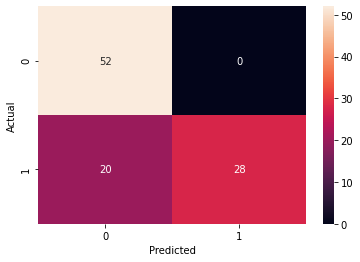

In [35]:
X = df.iloc[:,1:4]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

El proceso de entrenamiento no cambia si hay mas varibles, solo hay que involucrar las nuevas features a la hora de entrenar el modelo. En este caso el modelo tiene problemas para predecir el Target 1, habria que verificar si con otros parametros el modelo logra una mejor predicción y un mejor valor de los parametros de calidad.